In [51]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,Conv1D,Conv3D,MaxPool2D
fashion_mnist = keras.datasets.fashion_mnist
digit_minst = keras.datasets.mnist
import matplotlib.pyplot as plt

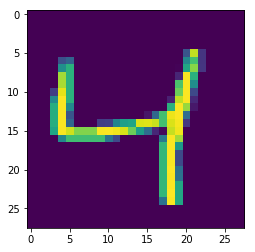

In [41]:
(train_images, train_labels), (test_images, test_labels) = digit_minst.load_data()
plt.imshow(train_images[2])
toto_images = test_images

In [42]:
train_images.shape

(60000, 28, 28)

In [31]:
model = Sequential()

model.add(Conv2D(16,kernel_size=5,activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D())

model.add(Conv2D(32,kernel_size=5,activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64,kernel_size=2,activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation= "softmax"))

model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics= ["accuracy"])
model.summary()
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 3, 3, 64)          8256      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)                0         
__________

In [43]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)

In [44]:
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [34]:
history = model.fit(train_images,train_labels ,validation_data=(test_images,test_labels), epochs=50 , batch_size= 280 , verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 14s - loss: 2.0670 - acc: 0.1986 - val_loss: 1.9196 - val_acc: 0.2226
Epoch 2/50
 - 13s - loss: 1.8475 - acc: 0.2255 - val_loss: 1.7825 - val_acc: 0.2420
Epoch 3/50
 - 13s - loss: 1.7470 - acc: 0.2400 - val_loss: 1.7078 - val_acc: 0.2510
Epoch 4/50
 - 13s - loss: 1.6509 - acc: 0.2877 - val_loss: 1.5215 - val_acc: 0.4088
Epoch 5/50
 - 14s - loss: 1.2179 - acc: 0.5146 - val_loss: 0.8468 - val_acc: 0.6850
Epoch 6/50
 - 14s - loss: 0.6959 - acc: 0.7586 - val_loss: 0.4782 - val_acc: 0.8883
Epoch 7/50
 - 13s - loss: 0.3768 - acc: 0.9230 - val_loss: 0.2659 - val_acc: 0.9600
Epoch 8/50
 - 13s - loss: 0.1948 - acc: 0.9618 - val_loss: 0.1363 - val_acc: 0.9657
Epoch 9/50
 - 13s - loss: 0.0999 - acc: 0.9737 - val_loss: 0.0999 - val_acc: 0.9748
Epoch 10/50
 - 13s - loss: 0.0755 - acc: 0.9797 - val_loss: 0.0916 - val_acc: 0.9760
Epoch 11/50
 - 13s - loss: 0.0610 - acc: 0.9835 - val_loss: 0.0938 - val_acc: 0.9746
Epoch 12/50
 - 13s - los

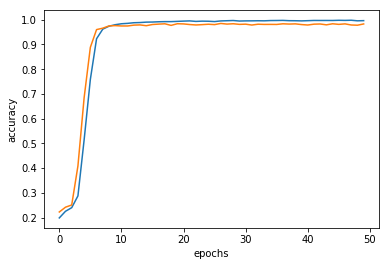

In [45]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

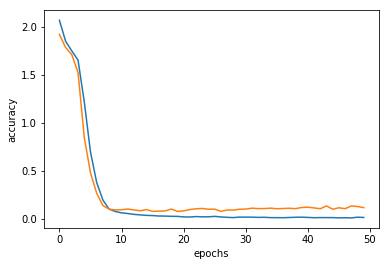

In [46]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [47]:
predict = model.predict(test_images)

In [48]:
predict[0]

array([2.0868085e-14, 4.3646593e-05, 4.4887738e-06, 2.8989874e-18,
       5.6717390e-08, 7.1617545e-23, 1.4478401e-15, 9.9995184e-01,
       1.6486633e-12, 6.1014521e-22], dtype=float32)

In [55]:
def plot_image(i,prediction_array,true_label,img):
    prediction_array,true_label,img = predict[i],test_labels[i],toto_images[i]
    plt.grid("False")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predict_label = np.argmax(prediction_array)
    if(predict_label == true_label):
        color = "Blue"
    else:
        color = "red"
        
    plt.xlabel("{} {} ({})".format(predict_label,
                                       100*np.max(prediction_array),
                                       true_label,color=color))
    


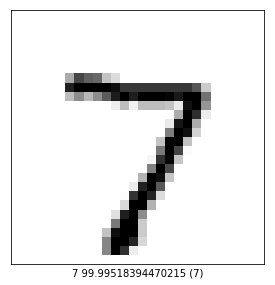

In [56]:
i = 0 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i,predict,test_labels,test_images)
plt.show()

In [57]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(range(10), [0,1,2,3,4,5,6,7,8,9], rotation=45)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

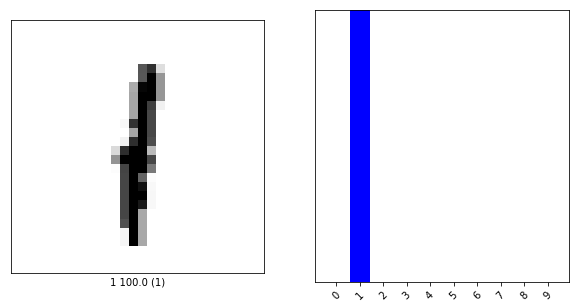

In [68]:
i = 1054
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i,predict,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predict,test_labels)
plt.show()